In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sqlalchemy import create_engine
from hold import connection_string

In [3]:
engine = create_engine(f'{connection_string}', encoding='iso-8859-1', connect_args={'connect_timeout': 10})

In [4]:
gtdDF = pd.read_sql_table('global_terrorism', con= engine)

In [5]:
gtdDF.head()

,iyear,imonth,iday,date,country_txt,region_txt,provstate,city,latitude,longitude,...,claimmode_txt,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,kidhijcountry,ransom,nkill,nwound,index1
0,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,None,Firearms,Unknown Gun Type,None,None,None,NaN,0.0,7.0,1.0
1,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,None,Firearms,Unknown Gun Type,None,None,None,0.0,0.0,7.0,2.0
2,2000,1,1,2000-01-01,India,South Asia,Jammu and Kashmir,Udhampur,32.93,75.14,...,None,Firearms,Unknown Gun Type,None,None,None,NaN,1.0,2.0,3.0
3,2000,1,1,2000-01-01,Kosovo,Eastern Europe,Kosovo (Province),Peje,42.66,20.31,...,None,Explosives/Bombs/Dynamite,Unknown Explosive Type,None,None,None,NaN,0.0,1.0,4.0
4,2000,1,1,2000-01-01,Somalia,Sub-Saharan Africa,Banaadir,Mogadishu,2.11,45.39,...,None,Firearms,Unknown Gun Type,None,None,None,NaN,6.0,10.0,5.0


In [6]:
casualties = gtdDF['nkill'] + gtdDF['nwound']
casualties.sum()

554384.0

In [7]:
gtdDF['casualties'] = gtdDF['nkill'] + gtdDF['nwound']
gtdDF.head()

,iyear,imonth,iday,date,country_txt,region_txt,provstate,city,latitude,longitude,...,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,kidhijcountry,ransom,nkill,nwound,index1,casualties
0,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,Firearms,Unknown Gun Type,None,None,None,NaN,0.0,7.0,1.0,7.0
1,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,Firearms,Unknown Gun Type,None,None,None,0.0,0.0,7.0,2.0,7.0
2,2000,1,1,2000-01-01,India,South Asia,Jammu and Kashmir,Udhampur,32.93,75.14,...,Firearms,Unknown Gun Type,None,None,None,NaN,1.0,2.0,3.0,3.0
3,2000,1,1,2000-01-01,Kosovo,Eastern Europe,Kosovo (Province),Peje,42.66,20.31,...,Explosives/Bombs/Dynamite,Unknown Explosive Type,None,None,None,NaN,0.0,1.0,4.0,1.0
4,2000,1,1,2000-01-01,Somalia,Sub-Saharan Africa,Banaadir,Mogadishu,2.11,45.39,...,Firearms,Unknown Gun Type,None,None,None,NaN,6.0,10.0,5.0,16.0


In [8]:
RegionCasualtiesDF = gtdDF[['index1','success','suicide','nkill','nwound','iyear','region_txt','casualties']]
RegionCasualtiesDF.head()

,index1,success,suicide,nkill,nwound,iyear,region_txt,casualties
0,1.0,1,0,0.0,7.0,2000,Sub-Saharan Africa,7.0
1,2.0,1,0,0.0,7.0,2000,Sub-Saharan Africa,7.0
2,3.0,1,0,1.0,2.0,2000,South Asia,3.0
3,4.0,1,0,0.0,1.0,2000,Eastern Europe,1.0
4,5.0,1,0,6.0,10.0,2000,Sub-Saharan Africa,16.0


In [9]:
RegionCasualties2DF = pd.get_dummies(RegionCasualtiesDF)
RegionCasualties2DF.head()

,index1,success,suicide,nkill,nwound,iyear,casualties,region_txt_Australasia & Oceania,region_txt_Central America & Caribbean,region_txt_Central Asia,region_txt_East Asia,region_txt_Eastern Europe,region_txt_Middle East & North Africa,region_txt_North America,region_txt_South America,region_txt_South Asia,region_txt_Southeast Asia,region_txt_Sub-Saharan Africa,region_txt_Western Europe
0,1.0,1,0,0.0,7.0,2000,7.0,0,0,0,0,0,0,0,0,0,0,1,0
1,2.0,1,0,0.0,7.0,2000,7.0,0,0,0,0,0,0,0,0,0,0,1,0
2,3.0,1,0,1.0,2.0,2000,3.0,0,0,0,0,0,0,0,0,1,0,0,0
3,4.0,1,0,0.0,1.0,2000,1.0,0,0,0,0,1,0,0,0,0,0,0,0
4,5.0,1,0,6.0,10.0,2000,16.0,0,0,0,0,0,0,0,0,0,0,1,0


In [10]:
RegionCasualtiesMergeDF = result = pd.merge(RegionCasualties2DF,RegionCasualtiesDF[['index1','region_txt']],on='index1')
#RegionCasualtiesMergeDF
RegionCasualtiesMergeDF.head()

,index1,success,suicide,nkill,nwound,iyear,casualties,region_txt_Australasia & Oceania,region_txt_Central America & Caribbean,region_txt_Central Asia,region_txt_East Asia,region_txt_Eastern Europe,region_txt_Middle East & North Africa,region_txt_North America,region_txt_South America,region_txt_South Asia,region_txt_Southeast Asia,region_txt_Sub-Saharan Africa,region_txt_Western Europe,region_txt
0,1.0,1,0,0.0,7.0,2000,7.0,0,0,0,0,0,0,0,0,0,0,1,0,Sub-Saharan Africa
1,2.0,1,0,0.0,7.0,2000,7.0,0,0,0,0,0,0,0,0,0,0,1,0,Sub-Saharan Africa
2,3.0,1,0,1.0,2.0,2000,3.0,0,0,0,0,0,0,0,0,1,0,0,0,South Asia
3,4.0,1,0,0.0,1.0,2000,1.0,0,0,0,0,1,0,0,0,0,0,0,0,Eastern Europe
4,5.0,1,0,6.0,10.0,2000,16.0,0,0,0,0,0,0,0,0,0,0,1,0,Sub-Saharan Africa


In [11]:
# Assign X (data) and y (target)
X = RegionCasualtiesMergeDF.drop(["region_txt"], axis=1)
y = RegionCasualtiesMergeDF["region_txt"]
print(X.shape, y.shape)

(92700, 19) (92700,)


In [12]:
# Split the data into training and testing
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
### END SOLUTION

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.715886371808702
Testing Data Score: 0.715900755124056


In [16]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['South Asia' 'Middle East & North Africa' 'South Asia' 'South Asia'
 'Middle East & North Africa' 'South Asia' 'Middle East & North Africa'
 'South Asia' 'Middle East & North Africa' 'Middle East & North Africa']
First 10 Actual labels: ['South Asia', 'Middle East & North Africa', 'South Asia', 'Western Europe', 'Middle East & North Africa', 'South Asia', 'Middle East & North Africa', 'South Asia', 'Middle East & North Africa', 'Middle East & North Africa']


In [17]:
RegionPredictionDF = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
Top30PredictionDF = RegionPredictionDF.head(30)
Top30PredictionDF

,Prediction,Actual
0,South Asia,South Asia
1,Middle East & North Africa,Middle East & North Africa
2,South Asia,South Asia
3,South Asia,Western Europe
4,Middle East & North Africa,Middle East & North Africa
5,South Asia,South Asia
6,Middle East & North Africa,Middle East & North Africa
7,South Asia,South Asia
8,Middle East & North Africa,Middle East & North Africa
9,Middle East & North Africa,Middle East & North Africa


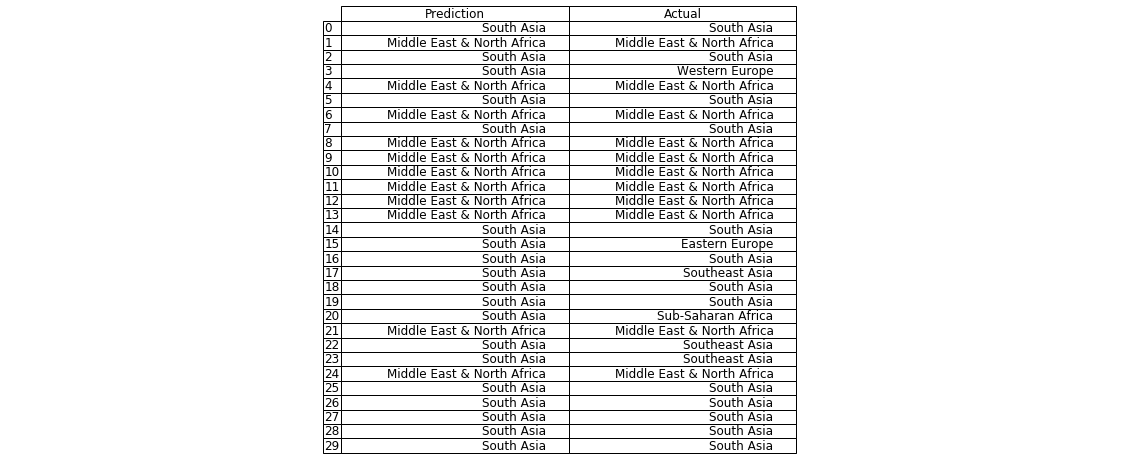

In [37]:
from pandas.plotting import table

fig, ax = plt.subplots(figsize = (20,2)) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
Ptable = table(ax, Top30PredictionDF, loc='center', colWidths=[0.17]*len(Top30PredictionDF.columns))
Ptable.auto_set_font_size(False) # Activate set fontsize manually
Ptable.set_fontsize(12) # if ++fontsize is necessary ++colWidths
Ptable.scale(1.2, 1.2) # change size table
plt.savefig('../GTA/front_end/static/front_end/assets/Casualties-Region-Logistic-Prediction.png', transparent = True)